In [6]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import local_binary_pattern
from skimage.color import label2rgb
from load_partitions import load_partitions_cmim

In [31]:
# settings for LBP
radius = 3
n_points = 8 * radius
method = 'uniform'


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


In [14]:
orig_shape = (80, 480)
train_x, _, train_m, _, _, _, _, _ = load_partitions_cmim('left_480x80', 1, 0, True, False, 0)

img0 = train_x[0, :].reshape(orig_shape)
msk0 = train_m[0, :].reshape(orig_shape)
img1 = train_x[1, :].reshape(orig_shape)
msk1 = train_m[1, :].reshape(orig_shape)
lbp0 = local_binary_pattern(img0, n_points, radius, method)
lbp1 = local_binary_pattern(img1, n_points, radius, method)

In [9]:
def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')

### Visualizing LBPs as they come

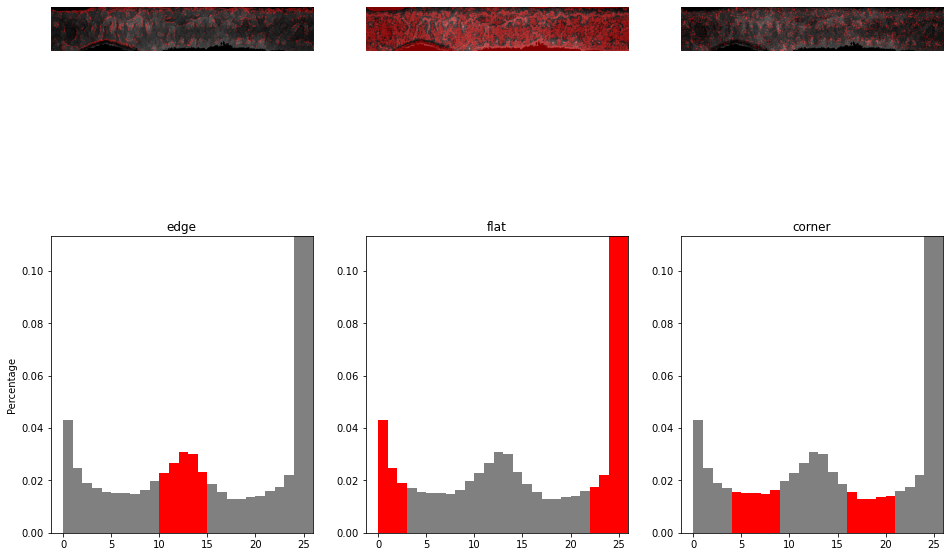

In [35]:
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img0, lbp0, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp0)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

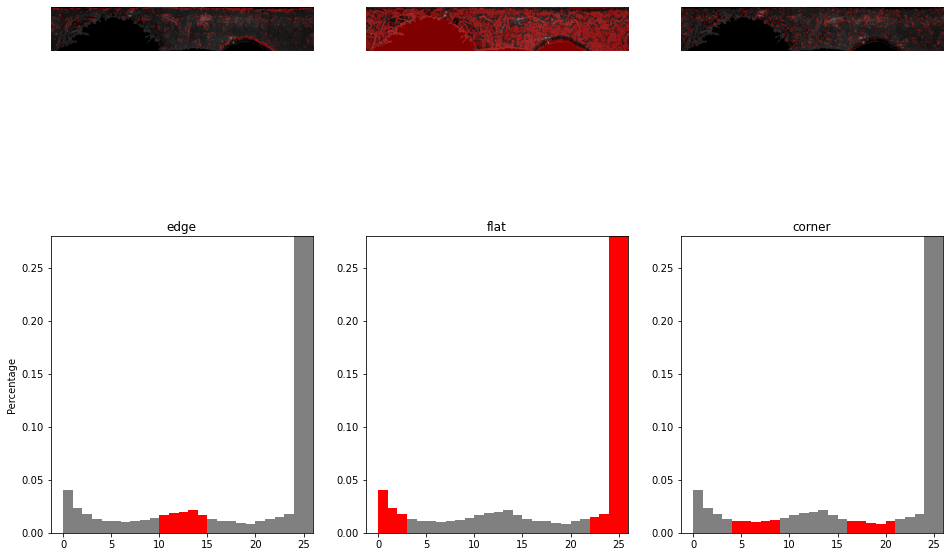

In [36]:
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img1, lbp1, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp1)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

### Remove masks from LBP

In [16]:
def set_masks_bin(in_lbp, mask):
    val = in_lbp.max() + 1
    out_lbp = in_lbp.copy()
    out_lbp[mask == 1] = val
    # TODO: in hist function(?), delete mask bin, and normalize along other bins
    return out_lbp

In [17]:
lbp0_nomask = set_masks_bin(lbp0, msk0)
lbp1_nomask = set_masks_bin(lbp1, msk1)

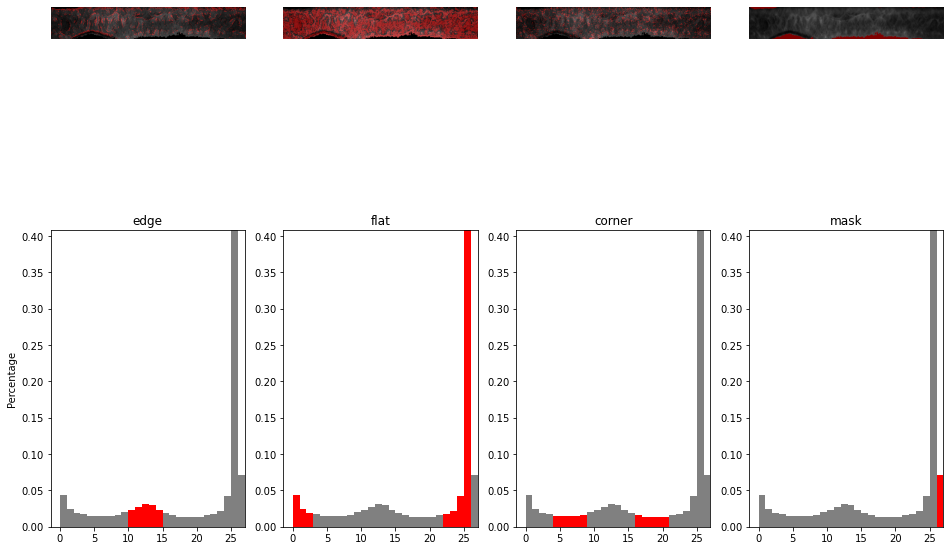

In [34]:
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.gray()

titles = ('edge', 'flat', 'corner', 'mask')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))
mask_labels = [int(lbp0_nomask.max())]

label_sets = (edge_labels, flat_labels, corner_labels, mask_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img0, lbp0_nomask, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp0_nomask)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 3)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

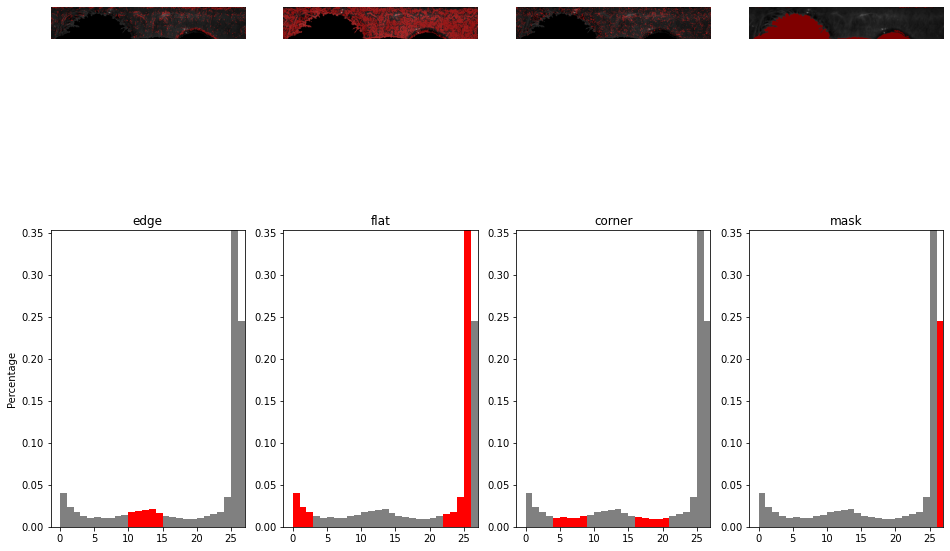

In [37]:
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=4, figsize=(16, 12))
plt.gray()

titles = ('edge', 'flat', 'corner', 'mask')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))
mask_labels = [int(lbp0_nomask.max())]

label_sets = (edge_labels, flat_labels, corner_labels, mask_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(img1, lbp1_nomask, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp1_nomask)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 3)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')